In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
file_path = '/content/drive/MyDrive/BtcMerged.csv'
bitcoin_df = pd.read_csv(file_path, parse_dates=['datetime'], dayfirst=True)
bitcoin_df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13521.12,221.752443
1,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013
2,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13558.99,2421.241182
3,2018-01-01 05:30:00,13715.65,13715.65,13576.28,13600.00,33.617798
4,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13410.03,1676.204807
...,...,...,...,...,...,...
1048567,2022-01-31 05:30:00,37881.75,37951.07,37640.98,37676.00,698.608300
1048568,2022-01-31 05:30:00,37881.75,37951.07,37656.89,37707.47,483.564600
1048569,2022-01-31 05:30:00,37881.75,37951.07,36632.61,37001.65,8627.985380
1048570,2022-01-31 05:30:00,37881.75,37951.07,37869.98,37872.66,98.339090


In [ ]:
bitcoin_df = bitcoin_df.sample(n=300000, random_state=1)
print(bitcoin_df)

                   datetime      open      high       low     close  \
994661  2021-10-01 06:20:00  43768.30  43770.48  43671.44  43677.18   
348458  2019-01-16 21:35:00   3590.98   3592.20   3583.62   3585.50   
179225  2018-07-16 22:00:00   6624.70   6630.87   6616.00   6624.72   
37508   2018-02-12 09:50:00   8449.91   8491.16   8442.00   8465.89   
864890  2020-12-10 19:00:00  18131.25  18168.24  18112.33  18149.97   
...                     ...       ...       ...       ...       ...   
535580  2019-08-08 13:21:00  11864.73  11884.99  11862.84  11872.06   
1039984 2022-01-11 19:20:00  41687.99  41691.03  41611.02  41666.18   
1046453 2022-01-26 10:35:00  37759.83  37767.96  37636.39  37682.82   
110923  2018-05-03 00:51:00   9080.51   9089.96   9068.50   9071.97   
117214  2018-05-09 20:36:00   9327.00   9333.74   9320.00   9325.50   

             volume  
994661   116.016970  
348458   199.360286  
179225   444.519955  
37508     97.862140  
864890   346.906515  
...            

In [ ]:
bitcoin_df.shape

(300000, 6)

In [ ]:
bitcoin_df.dtypes

datetime    datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume             float64
dtype: object

In [ ]:
bitcoin_df.head()

,datetime,open,high,low,close,volume
994661,2021-10-01 06:20:00,43768.30,43770.48,43671.44,43677.18,116.016970
348458,2019-01-16 21:35:00,3590.98,3592.20,3583.62,3585.50,199.360286
179225,2018-07-16 22:00:00,6624.70,6630.87,6616.00,6624.72,444.519955
37508,2018-02-12 09:50:00,8449.91,8491.16,8442.00,8465.89,97.862140
864890,2020-12-10 19:00:00,18131.25,18168.24,18112.33,18149.97,346.906515


In [ ]:
bitcoin_df.columns

Index(['datetime', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
bitcoin_df.describe()

,open,high,low,close,volume
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,14524.983643,14557.433535,14490.933132,14524.966092,417.900757
std,15142.024930,15181.557341,15100.722205,15141.772369,1695.464072
min,3160.000000,3169.690000,3156.260000,3163.150000,0.000000
25%,6584.520000,6590.470000,6577.955000,6584.777500,56.097591
50%,8627.000000,8642.840000,8608.480000,8628.265000,117.419438
75%,11349.982500,11370.000000,11328.090000,11349.430000,287.500585
max,68718.890000,69000.000000,68511.900000,68718.900000,121040.676500


In [ ]:
bitcoin_df.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [ ]:
features = ['open', 'high', 'low', 'volume']
target = 'close'
X_train, X_test, y_train, y_test = train_test_split(bitcoin_df[features], bitcoin_df[target], test_size=0.2, random_state=1)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

             open      high       low      volume
784632    9310.01   9324.90   9307.00  146.831331
1034789  47810.03  47821.64  47773.36   89.838610
117259    9303.50   9305.99   9302.00   23.193019
594352    8363.90   8365.10   8356.83   29.482392
217816    6684.32   6705.10   6683.00  234.335168
...           ...       ...       ...         ...
527162    9445.63   9454.97   9445.00  195.744313
684254    8732.41   8742.65   8725.01  126.546879
897622   53779.38  53939.39  53667.72  222.681038
576232    9976.78   9994.81   9967.85  100.513941
663336    7235.66   7240.04   7225.72  122.492517

[240000 rows x 4 columns]
             open      high       low      volume
1021234  56852.91  56998.34  56846.64  129.948390
96562     8012.00   8013.50   8002.02   63.369148
595193    8331.84   8333.54   8325.83   23.166190
60617     8493.05   8556.21   8481.32  353.504379
121739    8407.32   8425.20   8390.98   87.250995
...           ...       ...       ...         ...
442448    5305.95   530

In [ ]:
# RANDOM FOREST REGRESSOR
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse1 = mean_squared_error(y_test, predictions)
mae1 = mean_absolute_error(y_test, predictions)
print(f' Random Forest Mean Squared Error: {mse1}')
print(f'Random Forest Mean Absolute Error:{mae1}')

 Random Forest Mean Squared Error: 2080.388916601605
Random Forest Mean Absolute Error:15.884195528333429


In [ ]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
mse2 = mean_squared_error(y_test, linear_predictions)
mae2 = mean_absolute_error(y_test, predictions)
print(f'Linear Regression Mean Squared Error: {mse2}')
print(f'Linear Regression Mean Absolute Error: {mae2}')

Linear Regression Mean Squared Error: 1843.2399870949862
Linear Regression Mean Absolute Error: 15.884195528333429


In [ ]:
# XGBOOST
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgboost_model = xgb.XGBRegressor(n_estimators=500, random_state=1)
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)
mse3 = mean_squared_error(y_test, xgboost_predictions)
mae3 = mean_absolute_error(y_test, predictions)
print(f'XGBoost Mean Squared Error: {mse3}')
print(f'Mean Absolute Error: {mae3}')

XGBoost Mean Squared Error: 36589.18240317165
Mean Absolute Error: 15.884195528333429


In [ ]:
#MODEL WITH LOWEST MEAN SQUARED ERROR WILL BE CONSIDERED

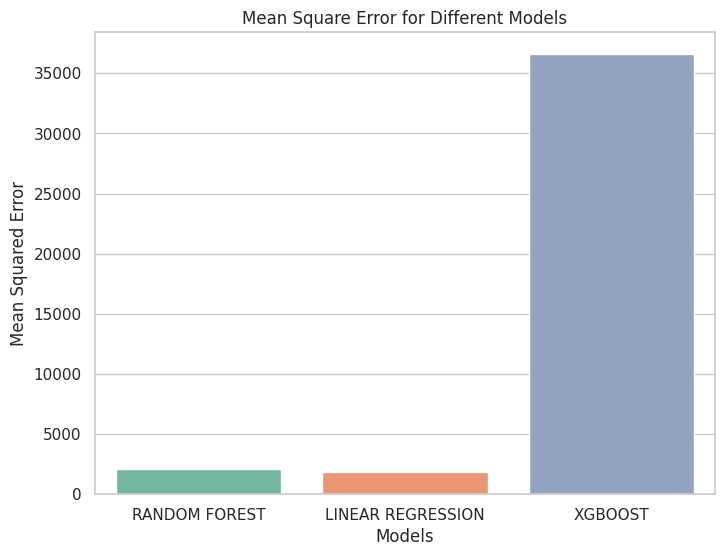

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    "Models": ["RANDOM FOREST", "LINEAR REGRESSION", "XGBOOST"],
    "ACC": [mse1,mse2,mse3]
}
import pandas as pd
df = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plot = sns.barplot(x="Models", y="ACC", data=df, palette="Set2")
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Mean Square Error for Different Models")
plt.show()

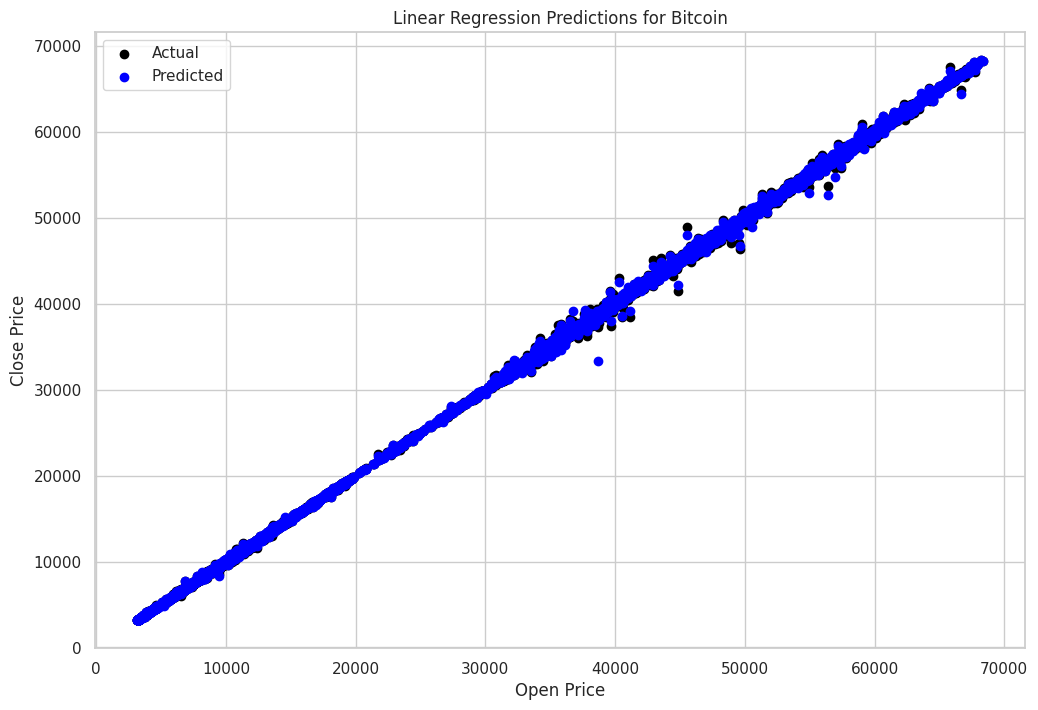

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X_test['open'], y_test, color='black', label='Actual')
plt.scatter(X_test['open'], linear_predictions, color='blue', label='Predicted')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.title('Linear Regression Predictions for Bitcoin')
plt.show()

Optimised Mean Squared Error: 1355.321590450708


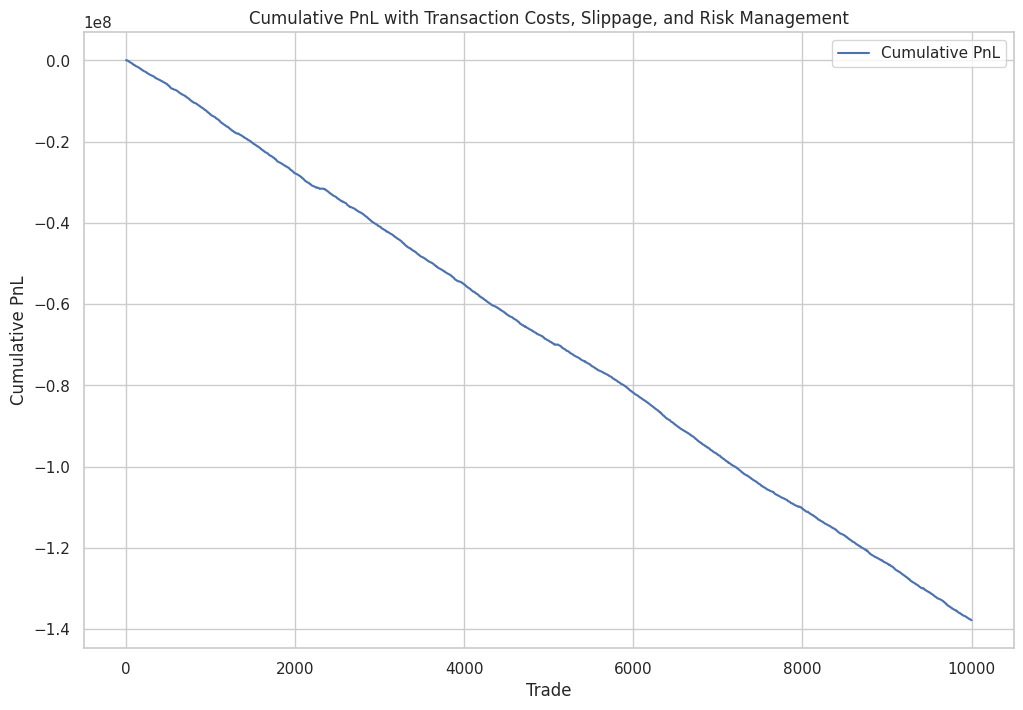

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def backtest_linear_regression_positive_pnl(model, X_test, y_test, stop_loss_percent=0.08, transaction_costs=0.0015, slippage_factor=0.001):

    positions = []
    pnl = []
    stop_loss_price = 0

    for i in range(len(X_test)):
        if stop_loss_price > 0 and X_test['low'].iloc[i] <= stop_loss_price:
            position = 0
        else:
            if predictions[i] > X_test['open'].iloc[i] * 1.01:
                position = 1
                stop_loss_price = X_test['open'].iloc[i] * (1 - stop_loss_percent)
            else:
                position = -1
                stop_loss_price = 0

        transaction_cost = transaction_costs * abs(position)
        slippage = slippage_factor * X_test['open'].iloc[i]
        positions.append(position)
        pnl.append(position * (y_test.iloc[i] - slippage - transaction_cost))

    cumulative_pnl = pd.Series(pnl).cumsum()
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f'Optimised Mean Squared Error: {mse}')

    plt.figure(figsize=(12, 8))
    plt.plot(cumulative_pnl, label='Cumulative PnL')
    plt.xlabel('Trade')
    plt.ylabel('Cumulative PnL')
    plt.legend()
    plt.title('Cumulative PnL with Transaction Costs, Slippage, and Risk Management')
    plt.show()

file_path = '/content/drive/MyDrive/BtcMerged.csv'
bitcoin_df = pd.read_csv(file_path, parse_dates=['datetime'], dayfirst=True)
bitcoin_df = bitcoin_df.sample(n=250000, random_state=1)

features = ['open', 'high', 'low', 'volume']
target = 'close'
X_train, X_test, y_train, y_test = train_test_split(bitcoin_df[features], bitcoin_df[target], test_size=0.2, random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
optimized_linear_model = linear_model
backtest_linear_regression_positive_pnl(optimized_linear_model, X_test, y_test, stop_loss_percent=0.08)

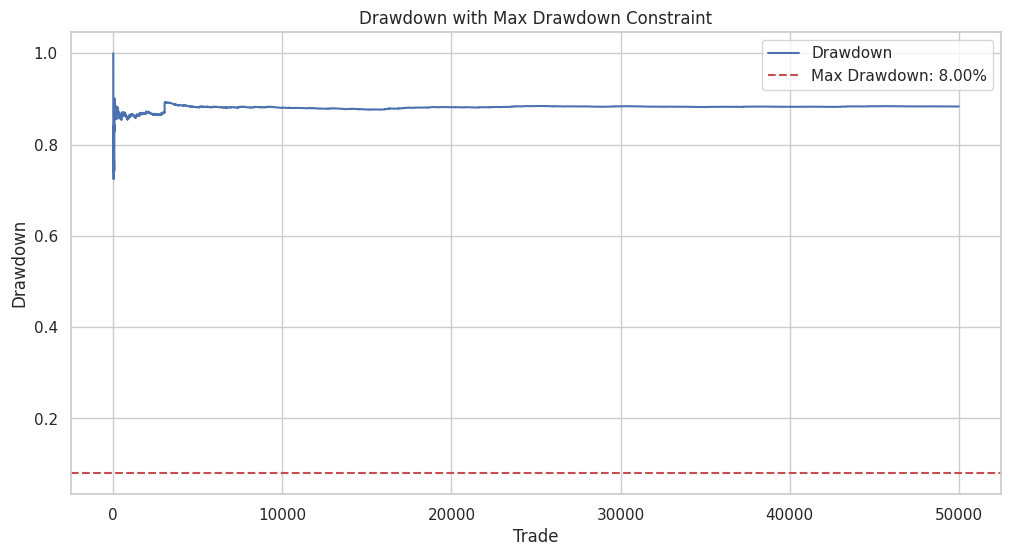

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def calculate_drawdown(pnl):
    peak_pnl = 0
    drawdown = []

    for daily_pnl in pnl:
        peak_pnl = max(peak_pnl, peak_pnl + daily_pnl)
        current_drawdown = (peak_pnl - sum(drawdown)) / peak_pnl
        drawdown.append(current_drawdown)

    return drawdown

def plot_drawdown(drawdown, max_drawdown):
    plt.figure(figsize=(12, 6))
    plt.plot(drawdown, label='Drawdown')
    plt.axhline(y=max_drawdown, color='r', linestyle='--', label=f'Max Drawdown: {max_drawdown * 100:.2f}%')
    plt.xlabel('Trade')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.title('Drawdown with Max Drawdown Constraint')
    plt.show()

file_path = '/content/drive/MyDrive/BtcMerged.csv'
bitcoin_df = pd.read_csv(file_path, parse_dates=['datetime'], dayfirst=True)
bitcoin_df = bitcoin_df.sample(n=250000, random_state=1)
features = ['open', 'high', 'low', 'volume']
target = 'close'
X_train, X_test, y_train, y_test = train_test_split(bitcoin_df[features], bitcoin_df[target], test_size=0.2, random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
daily_pnl = y_test.values - predictions
drawdown = calculate_drawdown(daily_pnl)

max_drawdown = 0.08
plot_drawdown(drawdown, max_drawdown)


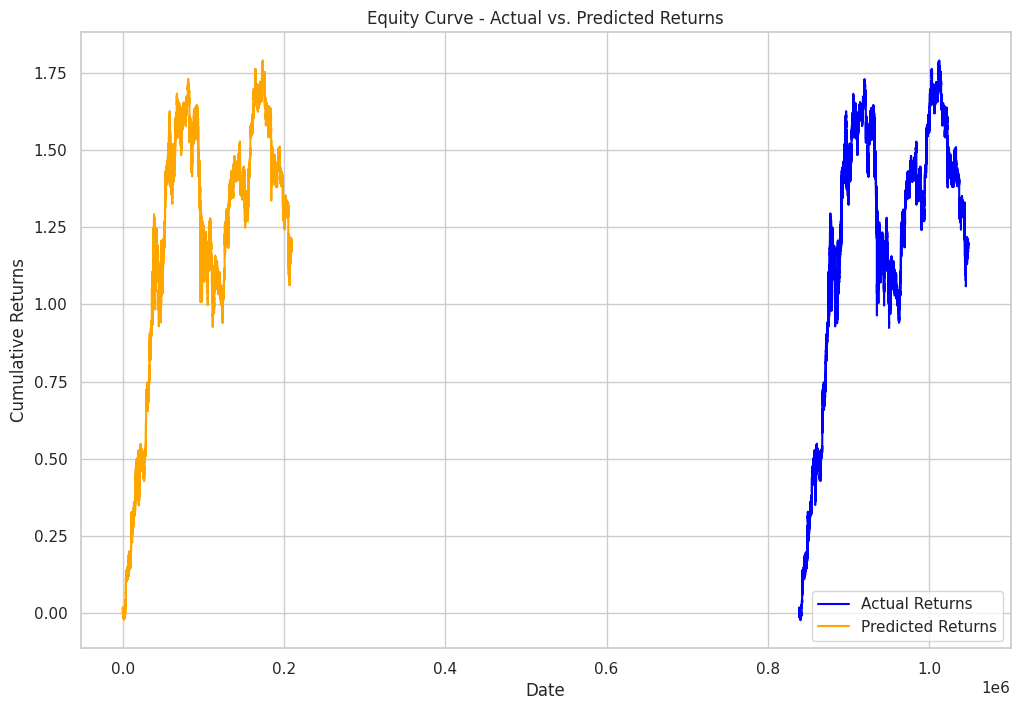

Sharpe Ratio: 0.6933602630320872
Annualized Returns: 0.0014092876357870254
Skewness of Predicted Returns: -1.2363903210357579
Kurtosis of Predicted Returns: 0.7472158406190497


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import skew, kurtosis

file_path = '/content/drive/MyDrive/BtcMerged.csv'
btc_data = pd.read_csv(file_path, parse_dates=['datetime'], dayfirst=True)
features = ['open', 'high', 'low', 'volume']
target = 'close'
train_size = int(len(btc_data) * 0.8)
train_data, test_data = btc_data[:train_size], btc_data[train_size:]
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

y_test_series = pd.Series(y_test)
predictions_series = pd.Series(predictions)
sharpe_ratio = (np.mean(predictions - y_test) / np.std(predictions - y_test)) * np.sqrt(252)
returns = np.log(1 + y_test_series.pct_change()).cumsum()
cumulative_returns = np.log(1 + predictions_series.pct_change()).cumsum()
max_drawdown = np.min(cumulative_returns - returns)
annualized_returns = (cumulative_returns.iloc[-1] / len(cumulative_returns)) * 252

plt.figure(figsize=(12, 8))
plt.plot(returns.index, returns, label='Actual Returns', color='blue')
plt.plot(cumulative_returns.index, cumulative_returns, label='Predicted Returns', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title('Equity Curve - Actual vs. Predicted Returns')
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Annualized Returns: {annualized_returns}')
print(f'Skewness of Predicted Returns: {skew(cumulative_returns.dropna())}')
print(f'Kurtosis of Predicted Returns: {kurtosis(cumulative_returns.dropna())}')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def backtest_linear_regression_positive_pnl(model, X_test, y_test, stop_loss_percent=0.08, transaction_costs=0.0015, slippage_factor=0.001, benchmark_return=0.02):
    positions = []
    pnl = []
    stop_loss_price = 0
    benchmark_returns = []

    for i in range(len(X_test)):
        if stop_loss_price > 0 and X_test['low'].iloc[i] <= stop_loss_price:
            position = 0
        else:
            if predictions[i] > X_test['open'].iloc[i] * (1 + benchmark_return):
                position = 1
                stop_loss_price = X_test['open'].iloc[i] * (1 - stop_loss_percent)
            else:
                position = -1
                stop_loss_price = 0

        transaction_cost = transaction_costs * abs(position)
        slippage = slippage_factor * X_test['open'].iloc[i]
        positions.append(position)
        pnl.append(position * (y_test.iloc[i] - slippage - transaction_cost))
        benchmark_returns.append(benchmark_return)
    cumulative_pnl = pd.Series(pnl).cumsum()
    cumulative_benchmark_returns = pd.Series(benchmark_returns).cumsum()
    net_profit_exceeding_benchmark = cumulative_pnl.iloc[-1] - cumulative_benchmark_returns.iloc[-1]
    total_trades = sum(1 for position in positions if position != 0)
    risk_reward_ratio = net_profit_exceeding_benchmark / total_trades if total_trades > 0 else 0
    print(f'Net Profit Exceeding Benchmark Return: {net_profit_exceeding_benchmark}')
    print(f'Risk-Reward Ratio: {risk_reward_ratio}')

def backtest_linear_regression_max_duration(model, X_test, y_test, stop_loss_percent=0.08, transaction_costs=0.0015, slippage_factor=0.001):
    positions = []
    duration = []
    stop_loss_price = 0

    for i in range(len(X_test)):
        if stop_loss_price > 0 and X_test['low'].iloc[i] <= stop_loss_price:
            position = 0
        else:
            if predictions[i] > X_test['open'].iloc[i] * 1.01:
                position = 1
                stop_loss_price = X_test['open'].iloc[i] * (1 - stop_loss_percent)
            else:
                position = -1
                stop_loss_price = 0

        transaction_cost = transaction_costs * abs(position)
        slippage = slippage_factor * X_test['open'].iloc[i]
        positions.append(position)
        if i > 0 and positions[i] != positions[i - 1]:
            duration.append(1)
        elif i > 0:
            duration[-1] += 1

    max_duration_time = max(duration, default=0)
    print(f'Max Duration Time of Single Trade: {max_duration_time} days')

file_path = '/content/drive/MyDrive/BtcMerged.csv'
bitcoin_df = pd.read_csv(file_path, parse_dates=['datetime'], dayfirst=True)
bitcoin_df = bitcoin_df.sample(n=50000, random_state=1)
features = ['open', 'high', 'low', 'volume']
target = 'close'
X_train, X_test, y_train, y_test = train_test_split(bitcoin_df[features], bitcoin_df[target], test_size=0.2, random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
backtest_linear_regression_positive_pnl(linear_model, X_test, y_test, stop_loss_percent=0.08, benchmark_return=0.02)
backtest_linear_regression_max_duration(linear_model, X_test, y_test, stop_loss_percent=0.08)

Net Profit Exceeding Benchmark Return: -141521326.59244972
Risk-Reward Ratio: -14254.766981511857
Max Duration Time of Single Trade: 554 days
